In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-20,332.690002,333.100006,325.040009,328.980011,328.980011,5953800
1,2017-12-21,329.589996,333.739990,327.209991,331.660004,331.660004,4385200
2,2017-12-22,329.510010,330.920013,324.820007,325.200012,325.200012,4215800
3,2017-12-26,323.829987,323.940002,316.579987,317.290009,317.290009,4378400
4,2017-12-27,316.000000,317.679993,310.750000,311.640015,311.640015,4712100


In [3]:
def linear_weight_moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period, len(signal)):
        buffer.append(
            (signal[i - period : i] * (np.arange(period) + 1)).sum()
            / (np.arange(period) + 1).sum()
        )
    return buffer

In [4]:
signal = np.copy(tesla.Close.values)

In [5]:
lw_ma_7 = linear_weight_moving_average(signal, 7)
lw_ma_14 = linear_weight_moving_average(signal, 14)
lw_ma_21 = linear_weight_moving_average(signal, 21)
lw_ma_40 = linear_weight_moving_average(signal, 40)

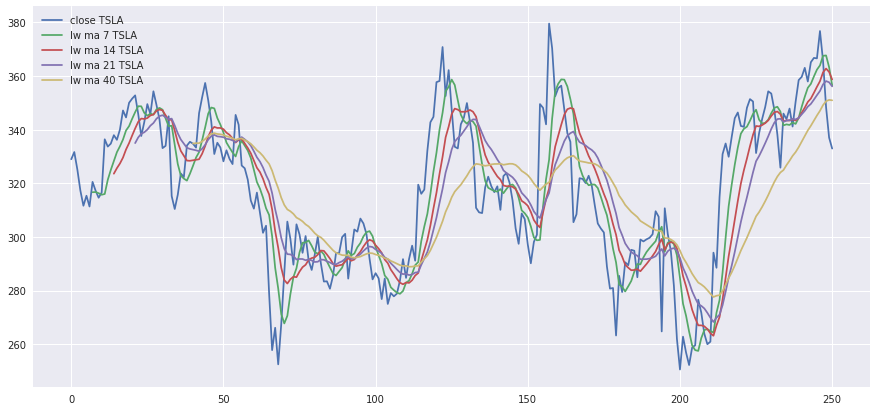

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(tesla.Close)), tesla.Close, label ='close TSLA')
plt.plot(np.arange(len(tesla.Close)), lw_ma_7, label = 'lw ma 7 TSLA')
plt.plot(np.arange(len(tesla.Close)), lw_ma_14, label = 'lw ma 14 TSLA')
plt.plot(np.arange(len(tesla.Close)), lw_ma_21, label = 'lw ma 21 TSLA')
plt.plot(np.arange(len(tesla.Close)), lw_ma_40, label = 'lw ma 40 TSLA')
plt.legend()
plt.show()